# Summarize titers and sequences by date

Create a single histogram on the same scale for number of titer measurements and number of genomic sequences per year to show the relative contribution of each data source.

In [1]:
import Bio
import Bio.SeqIO
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Configure matplotlib theme.
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 300,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

In [3]:
matplotlib.get_configdir()

u'/Users/jlhudd/.matplotlib'

In [4]:
plt.style.use("huddlej")

In [5]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'huddlej',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

## Load sequences

In [61]:
ls ../../seasonal-flu/data/*.fasta

../../seasonal-flu/data/h1n1pdm_ha.fasta
../../seasonal-flu/data/h1n1pdm_na.fasta
../../seasonal-flu/data/h3n2_ha.fasta
../../seasonal-flu/data/h3n2_na.fasta


In [62]:
# Open FASTA of HA sequences for H3N2.
sequences = Bio.SeqIO.parse("../../seasonal-flu/data/h3n2_ha.fasta", "fasta")

In [63]:
# Get strain names from sequences.
distinct_strains_with_sequences = pd.Series([sequence.name.split("|")[0].replace("-egg", "")
                                             for sequence in sequences]).drop_duplicates()

In [64]:
distinct_strains_with_sequences.shape

(59760,)

In [65]:
# Parse years from distinct strains with titers.
sequence_years = distinct_strains_with_sequences.apply(lambda strain: int(strain.split("/")[-1])).values

In [66]:
# Omit invalid sequence years.
sequence_years = sequence_years[sequence_years < 2019]

In [67]:
sequence_years.shape

(59750,)

## Load titers

In [82]:
# Read titers into a data frame.
titers = pd.read_table(
    "../../seasonal-flu/data/cdc_h3n2_egg_hi_titers.tsv",
    header=None,
    index_col=False,
    names=["test", "reference", "serum", "source", "titer", "assay"]
)

In [83]:
titers.head()

,test,reference,serum,source,titer,assay
0,A/Nepal/1380A/2013,A/NewYork/39/2012-egg,NewYork/39/12EggNo.2,niid_H3_HIdata(20150501).csv_186,640.0,hi
1,A/Nepal/1167B/2013,A/NewYork/39/2012-egg,NewYork/39/12EggNo.2,niid_H3_HIdata(20150501).csv_154,640.0,hi
2,A/Switzerland/9715293/2013-egg,A/NewYork/39/2012-egg,NewYork/39/12EggNo.2,niid_H3_HIdata(20150423).csv_42,160.0,hi
3,A/Nepal/1299A/2013,A/NewYork/39/2012-egg,NewYork/39/12EggNo.2,niid_H3_HIdata(20150501).csv_170,640.0,hi
4,A/Nepal/1442B/2013,A/NewYork/39/2012-egg,NewYork/39/12EggNo.2,niid_H3_HIdata(20150501).csv_106,640.0,hi


In [84]:
titers["test_year"] = titers["test"].apply(lambda strain: int(strain.replace("-egg", "").split("/")[-1]))

In [85]:
(titers["test_year"] < 2007).sum()

8

In [88]:
titers["test_year"].value_counts()

2017    11371
2018     7329
2016     4852
2014     1308
2013      561
2012      249
2008      200
2015       87
2005        8
Name: test_year, dtype: int64

In [86]:
titers.shape

(25965, 7)

In [87]:
titers[titers["test_year"] < 2007]["test"].unique().shape

(1,)

In [89]:
titers[titers["test_year"] < 2007]["test"].unique()

array(['A/Wisconsin/67/2005'], dtype=object)

In [50]:
# Identify distinct viruses represented as test strains in titers.
distinct_strains_with_titers = titers["test"].str.replace("-egg", "").drop_duplicates()

In [51]:
# Parse years from distinct strains with titers.
titer_years = distinct_strains_with_titers.apply(lambda strain: int(strain.split("/")[-1])).values

In [52]:
# Omit invalid titer years.
titer_years = titer_years[titer_years < 2019]

In [53]:
titer_years.shape

(11764,)

## Plot sequence and titer strains by year

In [54]:
sequence_years.min()

1968

In [55]:
sequence_years.max()

2018

In [56]:
[sequence_years, titer_years]

[array([2012, 2017, 2015, ..., 2016, 2017, 2007]),
 array([2013, 2012, 2014, ..., 2013, 2013, 2013])]

In [57]:
sequence

SeqRecord(seq=Seq('ctattaaccatgaagactatcattgctttgagctacattctatgtctggttttc...taa', SingleLetterAlphabet()), id='A/Managua/28/2007|flu|EPI154138|2007-06-11|north_america|nicaragua|managua|managua|cell|other_database_import|?|?', name='A/Managua/28/2007|flu|EPI154138|2007-06-11|north_america|nicaragua|managua|managua|cell|other_database_import|?|?', description='A/Managua/28/2007|flu|EPI154138|2007-06-11|north_america|nicaragua|managua|managua|cell|other_database_import|?|?', dbxrefs=[])

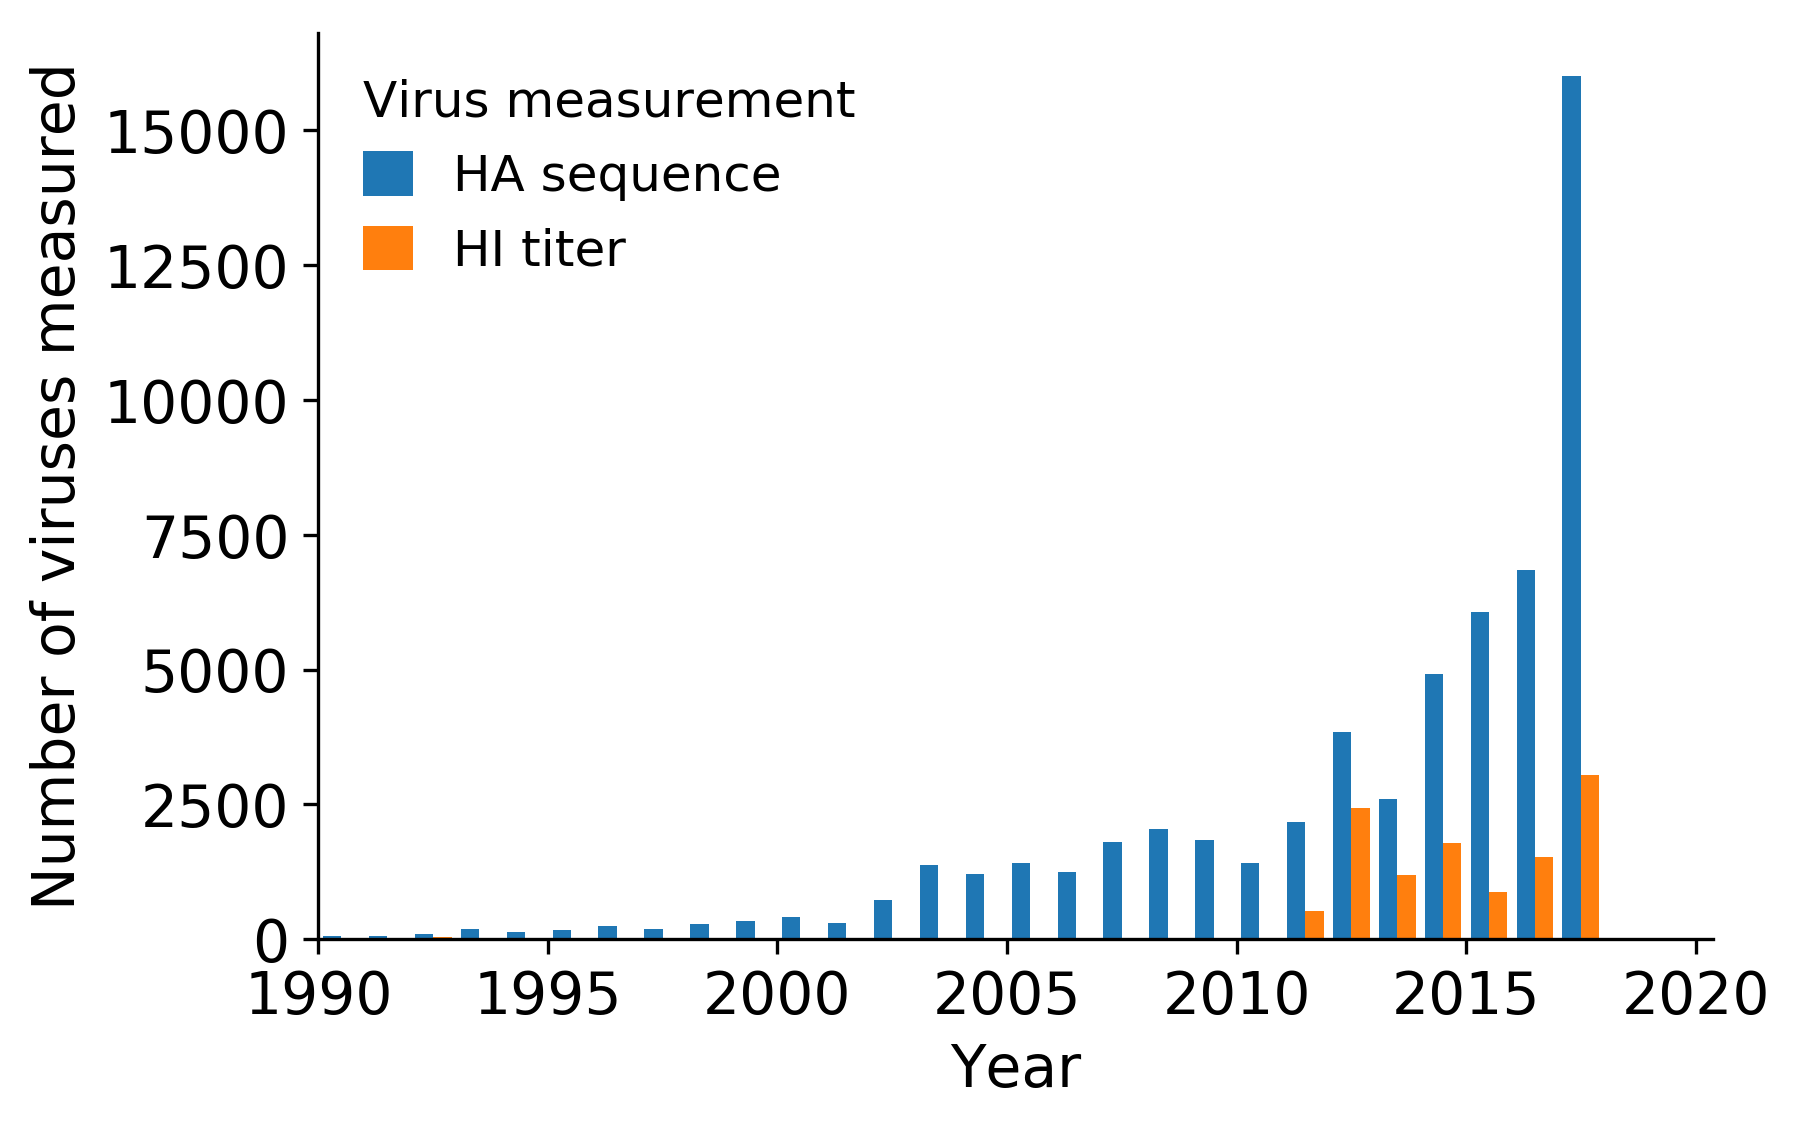

In [58]:
fig, ax = plt.subplots(1, 1)
bins = np.arange(1968, 2019)
ax.hist([sequence_years, titer_years], bins, histtype="bar", label=["HA sequence", "HI titer"])

legend = ax.legend(
    loc="upper left",
    ncol=1,
    frameon=False,
    handlelength=1,
    fancybox=False,
    handleheight=1
)
legend.set_title("Virus measurement", prop={"size": 12})
legend._legend_box.align = "left"

ax.set_xlim(1990)
ax.set_xlabel("Year")
ax.set_ylabel("Number of viruses measured")

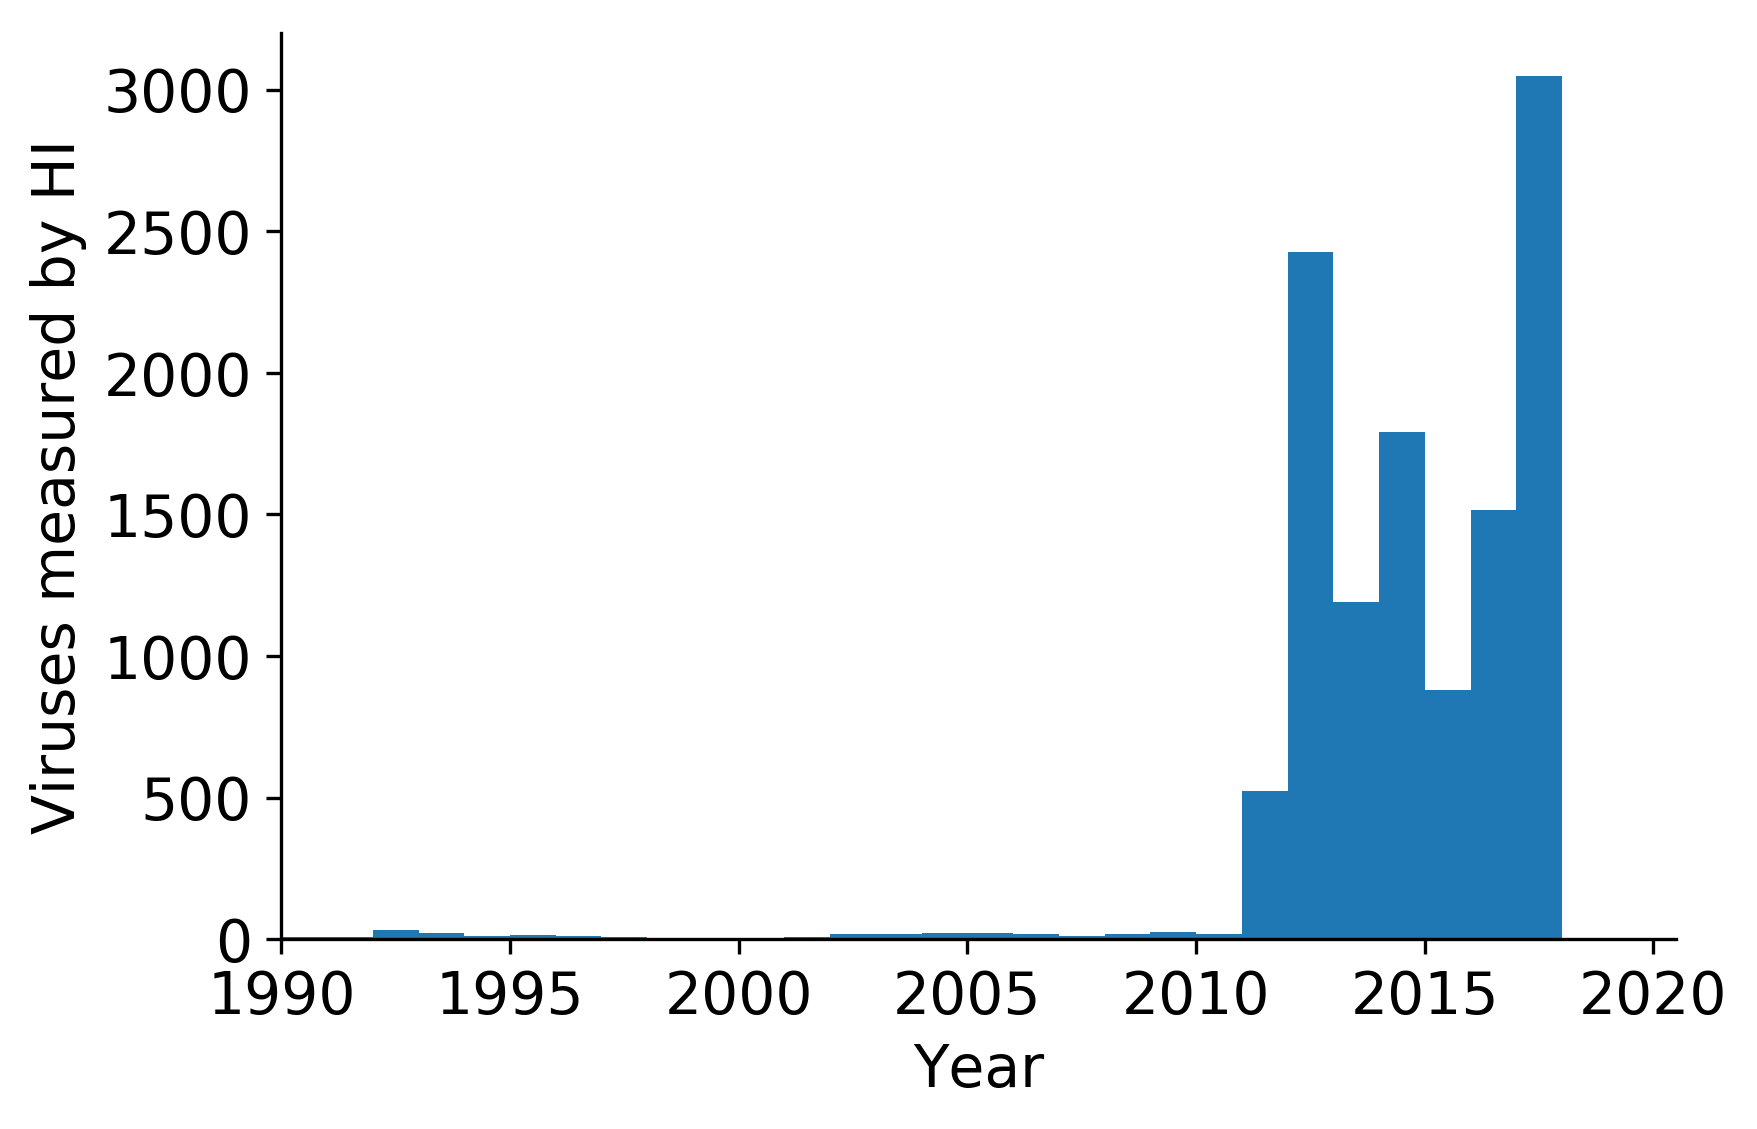

In [59]:
fig, ax = plt.subplots(1, 1)
bins = np.arange(1968, 2019)
ax.hist([titer_years], bins, histtype="bar", label=["HI titer"])

ax.set_xlim(1990)
ax.set_xlabel("Year")
ax.set_ylabel("Viruses measured by HI")

In [60]:
len(titer_years)

11764

In [35]:
(titer_years < 2010).sum()

370